In [18]:
# analysis.py
from cmath import exp
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
for t in 
df = pd.read_csv(r'C:\Users\johnj\Documents\SIG\19.restoration-fao\2022_seplan\carbon-images\tables\1.2.a.natural-asia-humid.csv',header=None)
# df = pd.read_csv(r'C:\Users\johnj\Documents\SIG\70.seplan_carbon\standAge_v_agb_combined_2.csv')

print(df)

#
# df['standAge']

             0           1
0     0.602823    2.336235
1     1.417526    4.583416
2     2.195197    8.840461
3     2.935836   13.945974
4     3.528347   17.341949
..         ...         ...
106  86.739142  170.622851
107  87.553845  170.622851
108  88.368548  170.622851
109  89.183251  170.622851
110  89.849826  170.622851

[111 rows x 2 columns]


pars [22.20201292  0.08282659  1.65756327]  cov [[ 4.22745334e-02 -3.50576796e-05 -1.00987665e-03]
 [-3.50576796e-05  3.36450903e-08  8.34518072e-07]
 [-1.00987665e-03  8.34518072e-07  2.41301450e-05]]


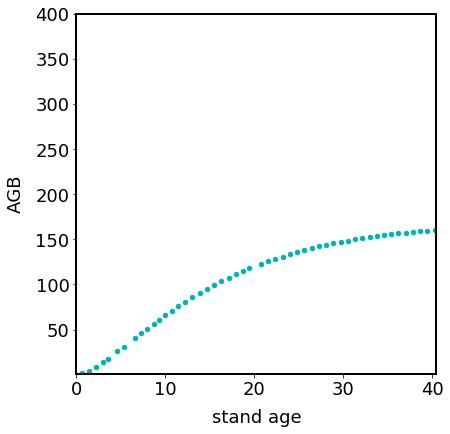

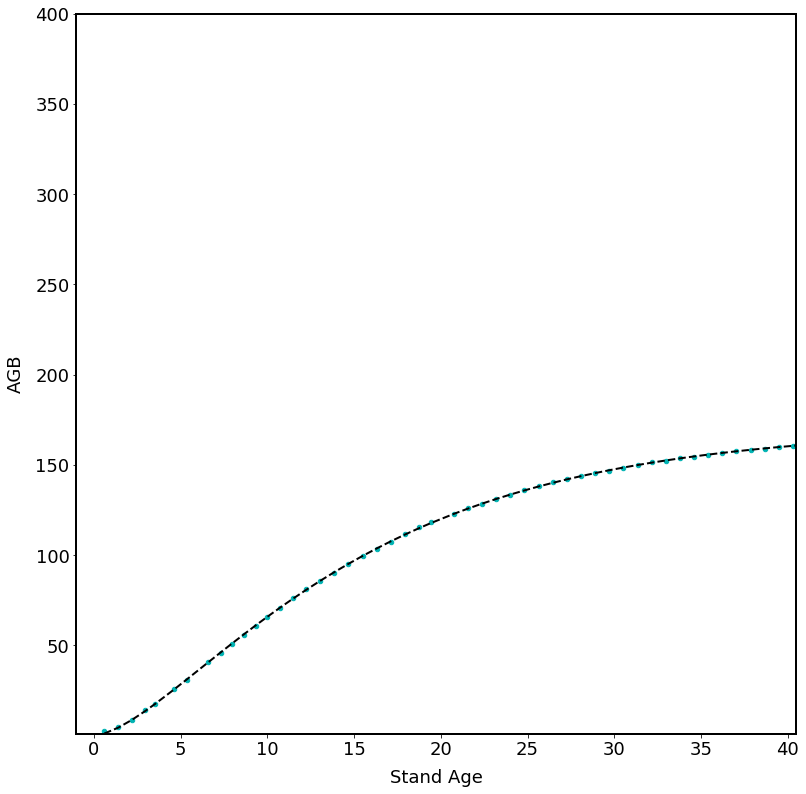

In [19]:
#  Chapman-Richards function looks like this:
# b0(1-EXP(-b2Age))^b2 
def chapman_richards(age:float, b0:float, b1:float, b2:float):
    return (b0 * (1 - np.exp(-b1*age))) ** b2
# df.sort_values(by='standAge', ascending=True, inplace=True)
x_dummy = df[0]
y_dummy = df[1]
pars, cov = curve_fit(f=chapman_richards,maxfev=10000, xdata=x_dummy, ydata=y_dummy, p0=[83, 0.5, 4], bounds=(-np.inf, np.inf))

print('pars',pars,' cov', cov)
# Edit the font, font size, and axes width
# mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 5))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# # Edit the major and minor ticks of the x and y axes
# ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
# ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# # Edit the major and minor tick locations of x and y axes
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('stand age', labelpad=10)
ax.set_ylabel('AGB', labelpad=10)

# Set the axis limits
ax.set_xlim(0, 40.5)
ax.set_ylim(1, 400)

#plt.savefig('dummy_dataset_exponential.png', dpi=100, bbox_inches='tight')
plt.show()

# Edit the font, font size, and axes width
# mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(10, 10))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Set the y-axis scaling to logarithmic
# ax.set_yscale('log')

# Edit the major and minor ticks of the x and y axes
# ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
# ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
# ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
# ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# # Edit the major and minor tick locations of x and y axes
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# #ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(100))

# Plot the noisy exponential data
ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
ax.plot(x_dummy, chapman_richards(x_dummy, *pars), linestyle='--', linewidth=2, color='black')

# Add the x and y-axis labels
ax.set_xlabel('Stand Age', labelpad=10)
ax.set_ylabel('AGB', labelpad=10)

# Set the axis limits
ax.set_xlim(-1, 40.5)
ax.set_ylim(1, 400)

#plt.savefig('dummy_dataset_exponential_fit.png', dpi=100, bbox_inches='tight')
plt.show()

In [26]:
params = (22.20201292,  0.08282659,  1.65756327)
biomass = chapman_richards(5, params[0], params[1], params[2])
	
# This will report metric tonnes of carbon per ha (NOT CO2e)
biomass

28.391696372735677